<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/SVR_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)

In [2]:
import missingno as msno

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
insurance=pd.read_csv('/content/drive/MyDrive/datasets/insurance.csv')

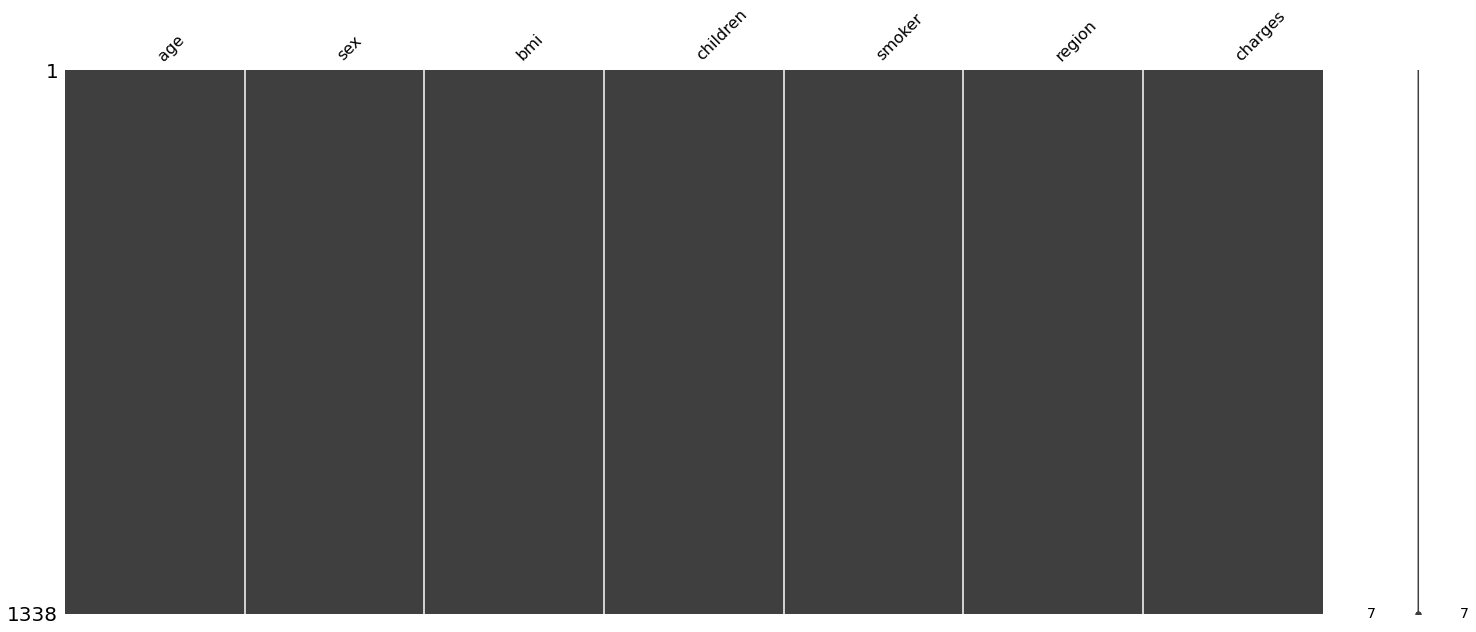

In [9]:
msno.matrix(insurance)

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#Codificamos variables
dumm_insurance=pd.get_dummies(insurance['region'])

insurance['sex']=insurance['sex'].map(lambda x: 1 if x=='female' else 0)

insurance['smoker']=insurance['smoker'].map(lambda x: 1 if x=='yes' else 0)


df_insurance= pd.concat([insurance,dumm_insurance],axis=1)

In [16]:
[col for col in df_insurance.columns if col not in [target,'region','southwest']]

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'northeast',
 'northwest',
 'southeast']

In [17]:
target='charges'

cont=[col for col in df_insurance.columns if col not in [target,'region','southwest']]

In [18]:
df_insurance=df_insurance[cont+[target]].copy()

In [19]:
#Target y variables independientes
X_insurance=df_insurance[cont]
y_insurance=df_insurance[[target]]

In [20]:
#Partimos df
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(X_insurance, y_insurance, test_size = 0.1, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [22]:
#Escalamos variables
sc_X=StandardScaler()

X_train_std=sc_X.fit_transform(X_train_insurance)

X_test_std=sc_X.transform(X_test_insurance)

In [23]:
from sklearn.svm import SVR

In [24]:
#Instanceamos modelo indicando el kernel
svm=SVR(kernel='rbf')

In [25]:
# Ajustamos modelos
svm.fit(X_train_std,y_train_insurance)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
#Hacemos predicciones
svm.predict(X_test_std)

array([9269.44386539, 9253.23747201, 9316.86298898, 9300.73930964,
       9272.48359656, 9244.88159716, 9219.84186152, 9284.40441406,
       9248.63364777, 9233.72487483, 9258.26263429, 9268.887285  ,
       9234.75798474, 9220.99874834, 9295.98105061, 9272.66874517,
       9290.51734629, 9229.68797859, 9231.4050234 , 9303.56247364,
       9319.87189368, 9291.32295766, 9299.63386096, 9325.34793695,
       9206.20881333, 9252.12841583, 9244.27275461, 9251.61100737,
       9214.46827359, 9252.05599888, 9252.04782828, 9333.73337519,
       9308.46527887, 9290.40738282, 9299.42615174, 9234.6660591 ,
       9264.18146424, 9311.54415416, 9314.31827707, 9188.52300433,
       9252.0202286 , 9211.71784829, 9323.86368316, 9326.04214501,
       9293.72399496, 9211.47934367, 9272.57432325, 9236.54611201,
       9235.44901637, 9282.84285255, 9232.81195828, 9225.5425116 ,
       9336.21907998, 9326.25674576, 9294.84246777, 9242.39442271,
       9212.865041  , 9264.54323032, 9276.73153924, 9289.00316

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
#Veamos las métricas
def metricas_regresion(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [29]:
metricas_regresion(y_test_insurance,svm.predict(X_test_std))

El r2 score es -0.20250859395771803
El error cuadrático medio es 233170560.0714691
El error medio absoluto es 9916.37415211405


In [30]:
#Probemos vecinos más cercanos
from sklearn.neighbors import KNeighborsRegressor

In [31]:
Knn=KNeighborsRegressor()

In [32]:
Knn.fit(X_train_std,y_train_insurance)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [33]:
Knn.predict(X_test_std)

array([[ 8299.452   ],
       [ 7721.46328 ],
       [46710.832484],
       [11777.80179 ],
       [11441.75795 ],
       [ 3668.90685 ],
       [ 2588.9581  ],
       [16508.519848],
       [ 9907.91122 ],
       [ 6124.48175 ],
       [ 7717.33854 ],
       [ 8954.39423 ],
       [ 7022.6268  ],
       [10970.78713 ],
       [20898.19424 ],
       [15144.790592],
       [11617.78854 ],
       [ 6707.536822],
       [ 6432.93079 ],
       [27637.204886],
       [28884.20109 ],
       [16009.216758],
       [10859.95526 ],
       [32173.00028 ],
       [ 1266.6699  ],
       [ 8007.555   ],
       [ 3247.18897 ],
       [11207.758272],
       [ 7938.462988],
       [ 7215.45852 ],
       [ 8001.68597 ],
       [47039.02148 ],
       [13789.98448 ],
       [12493.77308 ],
       [16476.06643 ],
       [ 4068.41571 ],
       [10282.274994],
       [38864.234574],
       [34013.86773 ],
       [ 3980.727666],
       [ 6364.529808],
       [ 2744.52292 ],
       [22469.667024],
       [437

In [35]:
#En este caso vecinos más cercanos a pesar de ser un modelo mucho más simple obtiene mejores resultados
metricas_regresion(y_test_insurance,Knn.predict(X_test_std))

El r2 score es 0.8797629981711873
El error cuadrático medio es 23314368.977161992
El error medio absoluto es 3257.934568238806
